In [20]:
# Xin Gao (Johnny)

#install.packages("readxl")
library("readxl")
library("tidyverse")
# Read in the dataset scraped from https://www.interest.co.nz/property/residential-auction-results
auctionRaw <- read_excel("house_price_raw.xlsx") %>%
              data.frame()
auctionRaw %>% head()

,Thumbnail,address,padb.property.description,Agent.s.,Auctiondetails,padb.beds,padb.baths,ListingID,Soldfor,padb.parking,Ratingvalue
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,https://www.interest.co.nz/sites/default/files/property-images/harcourts-st7735.jpg,"North New Brighton , 40 Jutland Street ST7735","SOLD - This listing was sold in October 2020 That&#39;s right! 40 Jutland Street is being sold &quot;As is where is&quot; with predominantly cosmetic damage only, so all serio... more detail","Agent(s): Dean Cations , Candice Toughey","Auction details: Friday, 9th October '20",3,1,Listing ID: st7735,"Sold for: $373,500",2,"Rating value: $335,000 (August ' 19)"
2,https://www.interest.co.nz/sites/default/files/property-images/harcourts-st7738.jpg,"New Brighton, 340 Marine Parade ST7738","SOLD - This listing was sold in October 2020 Stop your search!! Bring your bags ready to unpack.-&#9;4 Bedrooms, Master with en-suite and walk in wardrobe-&#9;Open plan livin... more detail","Agent(s): Sam Robinson , Manny McIvor","Auction details: Friday, 9th October '20",4,2,Listing ID: st7738,"Sold for: $555,000",2,"Rating value: $530,000 (August ' 19)"
3,https://www.interest.co.nz/sites/default/files/property-images/harcourts-ah5485.jpg,"Harewood, 58 Rotoiti Lane, Clearwater AH5485",SOLD - This listing was sold in October 2020 A rare opportunity exists to buy into Clearwater for those who desire a truly picture postcard setting slice of New Zealand.Overlo... more detail,Agent(s): Julie Proctor,"Auction details: Friday, 9th October '20",3,3,Listing ID: ah5485,"Sold for: $1,100,000",2,"Rating value: $1,010,000 (August ' 19)"
4,https://www.interest.co.nz/sites/default/files/property-images/harcourts-pi65557.jpg,"Westmorland, 68 Penruddock Rise PI65557","SOLD - This listing was sold in October 2020 When you&#39;ve run out of space and the family are just about falling out the sides ... this is the answer!Five bedrooms, four ba... more detail",Agent(s): Foss Shanahan,"Auction details: Friday, 9th October '20",5,4,Listing ID: pi65557,"Sold for: $905,000",4,"Rating value: $720,000 (August ' 19)"
5,https://www.interest.co.nz/sites/default/files/property-images/harcourts-cr43877.jpg,"Sydenham, 46 King Street CR43877","SOLD - This listing was sold in October 2020 A home, A project, A renovation, A rental, A development site, An investment, A land banking opportunity or..?- Estate Realisation... more detail",Agent(s): Christopher Graham,"Auction details: Thursday, 8th October '20",3,1,Listing ID: cr43877,"Sold for: $440,500",1,"Rating value: $395,000 (August ' 19)"
6,https://www.interest.co.nz/sites/default/files/property-images/harcourts-fm5634.jpg,"Sumner, 5 Starwood Lane FM5634","SOLD - This listing was sold in October 2020 Happily, nestled on the enviable Clifton Hill sits this fabulous family home that soaks up the sun, sea &amp; spectacular views. B... more detail","Agent(s): Joy Butel AREINZ Nat.Dip.R.E , Alistair Hazeldine","Auction details: Thursday, 8th October '20",4,2,Listing ID: fm5634,"Sold for: $970,000",2,"Rating value: $800,000 (August ' 19)"


In [21]:
# Extract the information we want including suburb, address, time, sold price and rating value
library(stringr)
auctionRaw <- auctionRaw %>%
              mutate(suburb = str_trim(sapply(str_split(auctionRaw$address, ',', 2), function(x) x[1])),
                     address = sapply(str_split(auctionRaw$address, ',', 2), function(x) x[2]),
                     time = sapply(str_split(auctionRaw$Auctiondetails, ':'), function(x) x[2]),
                     soldPrice = sapply(str_split(auctionRaw$Soldfor, ':'), function(x) x[2]),
                     ratingValue = sapply(str_split(auctionRaw$Ratingvalue, ':'), function(x) x[2]))
auctionRaw %>% head()

,Thumbnail,address,padb.property.description,Agent.s.,Auctiondetails,padb.beds,padb.baths,ListingID,Soldfor,padb.parking,Ratingvalue,suburb,time,soldPrice,ratingValue
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,https://www.interest.co.nz/sites/default/files/property-images/harcourts-st7735.jpg,40 Jutland Street ST7735,"SOLD - This listing was sold in October 2020 That&#39;s right! 40 Jutland Street is being sold &quot;As is where is&quot; with predominantly cosmetic damage only, so all serio... more detail","Agent(s): Dean Cations , Candice Toughey","Auction details: Friday, 9th October '20",3,1,Listing ID: st7735,"Sold for: $373,500",2,"Rating value: $335,000 (August ' 19)",North New Brighton,"Friday, 9th October '20","$373,500","$335,000 (August ' 19)"
2,https://www.interest.co.nz/sites/default/files/property-images/harcourts-st7738.jpg,340 Marine Parade ST7738,"SOLD - This listing was sold in October 2020 Stop your search!! Bring your bags ready to unpack.-&#9;4 Bedrooms, Master with en-suite and walk in wardrobe-&#9;Open plan livin... more detail","Agent(s): Sam Robinson , Manny McIvor","Auction details: Friday, 9th October '20",4,2,Listing ID: st7738,"Sold for: $555,000",2,"Rating value: $530,000 (August ' 19)",New Brighton,"Friday, 9th October '20","$555,000","$530,000 (August ' 19)"
3,https://www.interest.co.nz/sites/default/files/property-images/harcourts-ah5485.jpg,"58 Rotoiti Lane, Clearwater AH5485",SOLD - This listing was sold in October 2020 A rare opportunity exists to buy into Clearwater for those who desire a truly picture postcard setting slice of New Zealand.Overlo... more detail,Agent(s): Julie Proctor,"Auction details: Friday, 9th October '20",3,3,Listing ID: ah5485,"Sold for: $1,100,000",2,"Rating value: $1,010,000 (August ' 19)",Harewood,"Friday, 9th October '20","$1,100,000","$1,010,000 (August ' 19)"
4,https://www.interest.co.nz/sites/default/files/property-images/harcourts-pi65557.jpg,68 Penruddock Rise PI65557,"SOLD - This listing was sold in October 2020 When you&#39;ve run out of space and the family are just about falling out the sides ... this is the answer!Five bedrooms, four ba... more detail",Agent(s): Foss Shanahan,"Auction details: Friday, 9th October '20",5,4,Listing ID: pi65557,"Sold for: $905,000",4,"Rating value: $720,000 (August ' 19)",Westmorland,"Friday, 9th October '20","$905,000","$720,000 (August ' 19)"
5,https://www.interest.co.nz/sites/default/files/property-images/harcourts-cr43877.jpg,46 King Street CR43877,"SOLD - This listing was sold in October 2020 A home, A project, A renovation, A rental, A development site, An investment, A land banking opportunity or..?- Estate Realisation... more detail",Agent(s): Christopher Graham,"Auction details: Thursday, 8th October '20",3,1,Listing ID: cr43877,"Sold for: $440,500",1,"Rating value: $395,000 (August ' 19)",Sydenham,"Thursday, 8th October '20","$440,500","$395,000 (August ' 19)"
6,https://www.interest.co.nz/sites/default/files/property-images/harcourts-fm5634.jpg,5 Starwood Lane FM5634,"SOLD - This listing was sold in October 2020 Happily, nestled on the enviable Clifton Hill sits this fabulous family home that soaks up the sun, sea &amp; spectacular views. B... more detail","Agent(s): Joy Butel AREINZ Nat.Dip.R.E , Alistair Hazeldine","Auction details: Thursday, 8th October '20",4,2,Listing ID: fm5634,"Sold for: $970,000",2,"Rating value: $800,000 (August ' 19)",Sumner,"Thursday, 8th October '20","$970,000","$800,000 (August ' 19)"


In [22]:
# Seperate the day of week and the date, create new columns for them
auctionRaw <- auctionRaw %>%
              mutate(dow = sapply(str_split(auctionRaw$time, ','), function(x) x[1]),
                     date = sapply(str_split(auctionRaw$time, ','), function(x) x[2]))
auctionRaw %>% head()

,Thumbnail,address,padb.property.description,Agent.s.,Auctiondetails,padb.beds,padb.baths,ListingID,Soldfor,padb.parking,Ratingvalue,suburb,time,soldPrice,ratingValue,dow,date
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,https://www.interest.co.nz/sites/default/files/property-images/harcourts-st7735.jpg,40 Jutland Street ST7735,"SOLD - This listing was sold in October 2020 That&#39;s right! 40 Jutland Street is being sold &quot;As is where is&quot; with predominantly cosmetic damage only, so all serio... more detail","Agent(s): Dean Cations , Candice Toughey","Auction details: Friday, 9th October '20",3,1,Listing ID: st7735,"Sold for: $373,500",2,"Rating value: $335,000 (August ' 19)",North New Brighton,"Friday, 9th October '20","$373,500","$335,000 (August ' 19)",Friday,9th October '20
2,https://www.interest.co.nz/sites/default/files/property-images/harcourts-st7738.jpg,340 Marine Parade ST7738,"SOLD - This listing was sold in October 2020 Stop your search!! Bring your bags ready to unpack.-&#9;4 Bedrooms, Master with en-suite and walk in wardrobe-&#9;Open plan livin... more detail","Agent(s): Sam Robinson , Manny McIvor","Auction details: Friday, 9th October '20",4,2,Listing ID: st7738,"Sold for: $555,000",2,"Rating value: $530,000 (August ' 19)",New Brighton,"Friday, 9th October '20","$555,000","$530,000 (August ' 19)",Friday,9th October '20
3,https://www.interest.co.nz/sites/default/files/property-images/harcourts-ah5485.jpg,"58 Rotoiti Lane, Clearwater AH5485",SOLD - This listing was sold in October 2020 A rare opportunity exists to buy into Clearwater for those who desire a truly picture postcard setting slice of New Zealand.Overlo... more detail,Agent(s): Julie Proctor,"Auction details: Friday, 9th October '20",3,3,Listing ID: ah5485,"Sold for: $1,100,000",2,"Rating value: $1,010,000 (August ' 19)",Harewood,"Friday, 9th October '20","$1,100,000","$1,010,000 (August ' 19)",Friday,9th October '20
4,https://www.interest.co.nz/sites/default/files/property-images/harcourts-pi65557.jpg,68 Penruddock Rise PI65557,"SOLD - This listing was sold in October 2020 When you&#39;ve run out of space and the family are just about falling out the sides ... this is the answer!Five bedrooms, four ba... more detail",Agent(s): Foss Shanahan,"Auction details: Friday, 9th October '20",5,4,Listing ID: pi65557,"Sold for: $905,000",4,"Rating value: $720,000 (August ' 19)",Westmorland,"Friday, 9th October '20","$905,000","$720,000 (August ' 19)",Friday,9th October '20
5,https://www.interest.co.nz/sites/default/files/property-images/harcourts-cr43877.jpg,46 King Street CR43877,"SOLD - This listing was sold in October 2020 A home, A project, A renovation, A rental, A development site, An investment, A land banking opportunity or..?- Estate Realisation... more detail",Agent(s): Christopher Graham,"Auction details: Thursday, 8th October '20",3,1,Listing ID: cr43877,"Sold for: $440,500",1,"Rating value: $395,000 (August ' 19)",Sydenham,"Thursday, 8th October '20","$440,500","$395,000 (August ' 19)",Thursday,8th October '20
6,https://www.interest.co.nz/sites/default/files/property-images/harcourts-fm5634.jpg,5 Starwood Lane FM5634,"SOLD - This listing was sold in October 2020 Happily, nestled on the enviable Clifton Hill sits this fabulous family home that soaks up the sun, sea &amp; spectacular views. B... more detail","Agent(s): Joy Butel AREINZ Nat.Dip.R.E , Alistair Hazeldine","Auction details: Thursday, 8th October '20",4,2,Listing ID: fm5634,"Sold for: $970,000",2,"Rating value: $800,000 (August ' 19)",Sumner,"Thursday, 8th October '20","$970,000","$800,000 (August ' 19)",Thursday,8th October '20


In [23]:
# Keep only the stings we need and get rid of the "'" character and show the whole year number
auctionRaw$address = substr(str_trim(auctionRaw$address), 1, nchar(str_trim(auctionRaw$address))-7)
auctionRaw$soldPrice = substr(auctionRaw$soldPrice, 3, nchar(auctionRaw$ratingValue))
auctionRaw$ratingValue = substr(auctionRaw$ratingValue, 3, nchar(auctionRaw$ratingValue)-13)
auctionRaw$date = str_replace(auctionRaw$date, "'", "20")
auctionRaw %>% head()

,Thumbnail,address,padb.property.description,Agent.s.,Auctiondetails,padb.beds,padb.baths,ListingID,Soldfor,padb.parking,Ratingvalue,suburb,time,soldPrice,ratingValue,dow,date
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,https://www.interest.co.nz/sites/default/files/property-images/harcourts-st7735.jpg,40 Jutland Street,"SOLD - This listing was sold in October 2020 That&#39;s right! 40 Jutland Street is being sold &quot;As is where is&quot; with predominantly cosmetic damage only, so all serio... more detail","Agent(s): Dean Cations , Candice Toughey","Auction details: Friday, 9th October '20",3,1,Listing ID: st7735,"Sold for: $373,500",2,"Rating value: $335,000 (August ' 19)",North New Brighton,"Friday, 9th October '20","373,500","335,000",Friday,9th October 2020
2,https://www.interest.co.nz/sites/default/files/property-images/harcourts-st7738.jpg,340 Marine Parade,"SOLD - This listing was sold in October 2020 Stop your search!! Bring your bags ready to unpack.-&#9;4 Bedrooms, Master with en-suite and walk in wardrobe-&#9;Open plan livin... more detail","Agent(s): Sam Robinson , Manny McIvor","Auction details: Friday, 9th October '20",4,2,Listing ID: st7738,"Sold for: $555,000",2,"Rating value: $530,000 (August ' 19)",New Brighton,"Friday, 9th October '20","555,000","530,000",Friday,9th October 2020
3,https://www.interest.co.nz/sites/default/files/property-images/harcourts-ah5485.jpg,"58 Rotoiti Lane, Clearwater",SOLD - This listing was sold in October 2020 A rare opportunity exists to buy into Clearwater for those who desire a truly picture postcard setting slice of New Zealand.Overlo... more detail,Agent(s): Julie Proctor,"Auction details: Friday, 9th October '20",3,3,Listing ID: ah5485,"Sold for: $1,100,000",2,"Rating value: $1,010,000 (August ' 19)",Harewood,"Friday, 9th October '20","1,100,000","1,010,000",Friday,9th October 2020
4,https://www.interest.co.nz/sites/default/files/property-images/harcourts-pi65557.jpg,68 Penruddock Rise,"SOLD - This listing was sold in October 2020 When you&#39;ve run out of space and the family are just about falling out the sides ... this is the answer!Five bedrooms, four ba... more detail",Agent(s): Foss Shanahan,"Auction details: Friday, 9th October '20",5,4,Listing ID: pi65557,"Sold for: $905,000",4,"Rating value: $720,000 (August ' 19)",Westmorland,"Friday, 9th October '20","905,000","720,000",Friday,9th October 2020
5,https://www.interest.co.nz/sites/default/files/property-images/harcourts-cr43877.jpg,46 King Street,"SOLD - This listing was sold in October 2020 A home, A project, A renovation, A rental, A development site, An investment, A land banking opportunity or..?- Estate Realisation... more detail",Agent(s): Christopher Graham,"Auction details: Thursday, 8th October '20",3,1,Listing ID: cr43877,"Sold for: $440,500",1,"Rating value: $395,000 (August ' 19)",Sydenham,"Thursday, 8th October '20","440,500","395,000",Thursday,8th October 2020
6,https://www.interest.co.nz/sites/default/files/property-images/harcourts-fm5634.jpg,5 Starwood Lane,"SOLD - This listing was sold in October 2020 Happily, nestled on the enviable Clifton Hill sits this fabulous family home that soaks up the sun, sea &amp; spectacular views. B... more detail","Agent(s): Joy Butel AREINZ Nat.Dip.R.E , Alistair Hazeldine","Auction details: Thursday, 8th October '20",4,2,Listing ID: fm5634,"Sold for: $970,000",2,"Rating value: $800,000 (August ' 19)",Sumner,"Thursday, 8th October '20","970,000","800,000",Thursday,8th October 2020


In [24]:
# Create the new dataframe only including columns we need
auction <- auctionRaw %>%
           select(suburb, address, padb.beds, padb.baths, padb.parking, date, dow, ratingValue, soldPrice)
auction %>% head()

,suburb,address,padb.beds,padb.baths,padb.parking,date,dow,ratingValue,soldPrice
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,North New Brighton,40 Jutland Street,3,1,2,9th October 2020,Friday,"335,000","373,500"
2,New Brighton,340 Marine Parade,4,2,2,9th October 2020,Friday,"530,000","555,000"
3,Harewood,"58 Rotoiti Lane, Clearwater",3,3,2,9th October 2020,Friday,"1,010,000","1,100,000"
4,Westmorland,68 Penruddock Rise,5,4,4,9th October 2020,Friday,"720,000","905,000"
5,Sydenham,46 King Street,3,1,1,8th October 2020,Thursday,"395,000","440,500"
6,Sumner,5 Starwood Lane,4,2,2,8th October 2020,Thursday,"800,000","970,000"


In [25]:
# Rename the columns and format the column types, need to get rid of the comma between the price numbers
auction <- auction %>%
           rename(bedroom = padb.beds,
                  bathroom = padb.baths,
                  parking = padb.parking) %>%
           na.omit()
auction$bedroom = as.integer(auction$bedroom)
auction$bathroom = as.integer(auction$bathroom)
auction$parking = as.integer(auction$parking)
auction$ratingValue = as.numeric(gsub(",", "", auction$ratingValue))
auction$soldPrice = as.numeric(gsub(",", "", auction$soldPrice))
auction %>% head()
write.csv(auction, file = 'invidual_house_price_dataset.csv', row.names = FALSE)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


,suburb,address,bedroom,bathroom,parking,date,dow,ratingValue,soldPrice
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,North New Brighton,40 Jutland Street,3,1,2,9th October 2020,Friday,335000,373500
2,New Brighton,340 Marine Parade,4,2,2,9th October 2020,Friday,530000,555000
3,Harewood,"58 Rotoiti Lane, Clearwater",3,3,2,9th October 2020,Friday,1010000,1100000
4,Westmorland,68 Penruddock Rise,5,4,4,9th October 2020,Friday,720000,905000
5,Sydenham,46 King Street,3,1,1,8th October 2020,Thursday,395000,440500
6,Sumner,5 Starwood Lane,4,2,2,8th October 2020,Thursday,800000,970000


In [26]:
# Change Mount Pleasant to Mt Pleasant
auction[auction == "Mount Pleasant"] <- "Mt Pleasant"
# Change Linwood North to Linwood
auction[auction == "Linwood North"] <- "Linwood"
# Change Cashmere hills to Cashmere
auction[auction == "Cashmere hills"] <- "Cashmere"
# Change Tumara Park to Burwood
auction[auction == "Tumara Park"] <- "Burwood"
# Change Ladbrooks to Halswell
auction[auction == "Ladbrooks"] <- "Halswell"
# Change Waitikiri to Parklands
auction[auction == "Waitikiri"] <- "Parklands"

# Group by suburb and calculate the average, lowest, median, highest house price and aslo the average bedrooms
suburb_housing <- auction %>%
                  group_by(suburb) %>%
                  summarise(average_house_price = round(mean(soldPrice, na.rm = TRUE)),
                            lowest_house_price = min(soldPrice, na.rm = TRUE),
                            median_house_price = median(soldPrice, na.rm = TRUE),
                            highest_house_price = max(soldPrice, na.rm = TRUE),
                            average_bedroom = round(mean(bedroom, na.rm = TRUE), 3)) %>%
                  arrange(desc(average_house_price)) %>% na.omit()

suburb_housing

Warning message in min(soldPrice, na.rm = TRUE):
“no non-missing arguments to min; returning Inf”
Warning message in max(soldPrice, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


suburb,average_house_price,lowest_house_price,median_house_price,highest_house_price,average_bedroom
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Clifton,1800000,1800000,1800000,1800000,3.000
Kennedys Bush,1331667,1100000,1375000,1520000,4.250
Harewood,1186633,451000,950000,3125000,3.938
Cashmere Hills,1171667,930000,1150000,1435000,4.000
Merivale - Christchurch City,1145417,365000,922500,2750000,3.477
Murray Aynsley,1080000,1080000,1080000,1080000,4.000
Fendalton,1073222,475000,936500,2700000,3.660
Scarborough,1000000,1000000,1000000,1000000,4.000
Templeton,967500,685000,967500,1250000,4.500


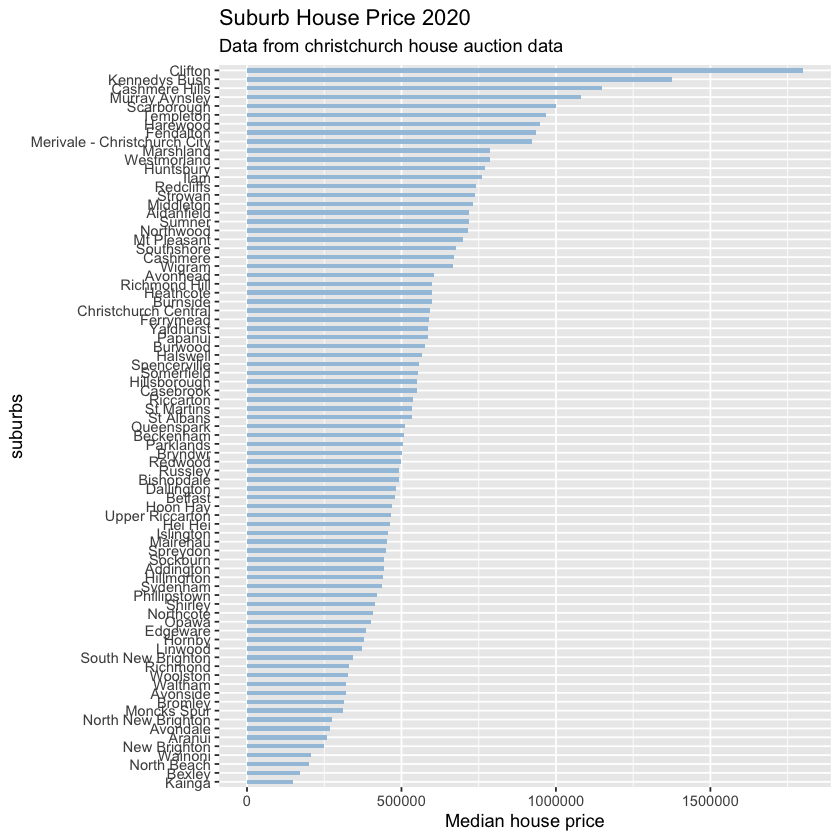

In [27]:
ggplot(suburb_housing, aes(x=reorder(suburb, median_house_price), y=median_house_price)) + 
  geom_bar(stat="identity", width=.5,fill="#a3c4dc")  +
  labs(x = 'suburbs',y='Median house price',subtitle="Data from christchurch house auction data", 
       title= "Suburb House Price 2020") + 
  coord_flip()

write.csv(suburb_housing, file = 'suburb_level_house_price_summary.csv', row.names = FALSE)

In [19]:
#The end